In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/match_data.csv')
df.head()

,Date,Team1,Team2,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,28/03/2024,spirit,faze,0,4,79.2,1,72.4,1.03,0.63,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,28/03/2024,spirit,natus_vincere,1,4,79.2,2,77.3,1.03,0.63,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,28/03/2024,spirit,imperial,1,4,79.2,18,72.0,1.03,0.63,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,28/03/2024,spirit,cloud9,1,4,79.2,7,63.0,1.03,0.63,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,28/03/2024,spirit,metizport,1,4,79.2,30,62.0,1.03,0.63,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [3]:
df['Score'].value_counts()

Score
1    1296
0    1259
Name: count, dtype: int64

In [4]:
df = df.drop(['Team1', 'Team2', 'Date'], axis=1)
df.head()

,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,1,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,1,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,1,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [5]:
X = df.drop(['Score'], axis=1)
X.head()

,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,Team1_Player2_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,0.74,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [6]:
y = df['Score']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4799 - loss: 2.6277 - val_accuracy: 0.5526 - val_loss: 2.4460
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 2.4220 - val_accuracy: 0.5623 - val_loss: 2.2797
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5229 - loss: 2.2609 - val_accuracy: 0.5599 - val_loss: 2.1272
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5632 - loss: 2.0979 - val_accuracy: 0.5892 - val_loss: 1.9889
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 1.9535 - val_accuracy: 0.5941 - val_loss: 1.8607
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5490 - loss: 1.8356 - val_accuracy: 0.5917 - val_loss: 1.7421
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5738 - loss: 1.7088 - val_accuracy: 0.5941 - val_loss: 1.6346
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5941 - loss: 1.6058 - val_accuracy: 0.6088 - v

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.6039 - loss: 0.7217
Test Loss: 0.7282114624977112
Test Accuracy: 0.60665363073349


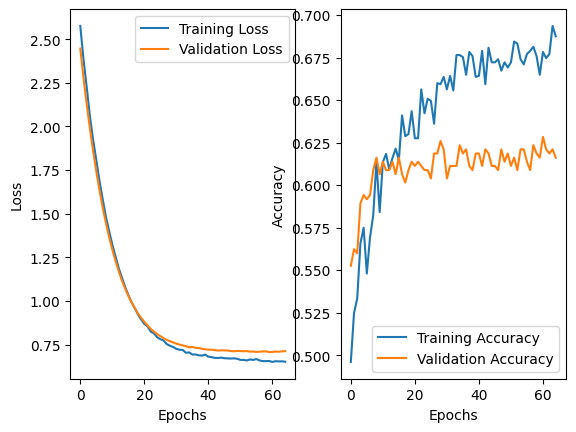

In [27]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()